In [129]:
import pandas as pd
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

In [130]:
cols=['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator','default','owns_car','tenure']

df=pd.read_csv('/Users/apple/Desktop/KPMG.csv',usecols=cols)

In [131]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01.Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [132]:
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [133]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

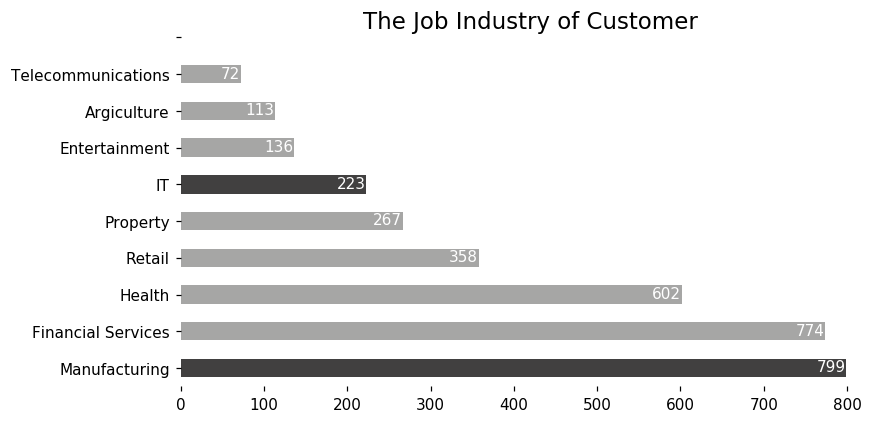

In [134]:

fig, ax1 = plt.subplots(figsize=(8.2, 4.2),  # width, height in inches
                        dpi=110) 

df['job_industry_category'].value_counts().plot(kind='barh',color=[GRAY2]+[GRAY8]*4)

plt.title('The Job Industry of Customer',fontsize=15)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)

for y,x in enumerate(df['job_industry_category'].value_counts().tolist()):
   ax1.text(x-1,y-0.1,'%s'%round(x,1),
            ha='right',
            size=10,
            color='#FFFFFF')
ax1.set_yticks(np.arange(10))


In [135]:
df['gender']=df['gender'].replace(['F','M'],['Female','Male'])

In [136]:
df['gender']=df['gender'].replace(['Femal','U'],['Female','Unknown'])

In [137]:
df['gender'].value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [138]:
df['DOB']=pd.to_datetime(df['DOB'])
import datetime as dt
now_year =dt.datetime.today().year #当前的年份
df['age']=now_year-df['DOB'].dt.year

In [144]:
bins=[0,20,50,80]
df['agestage']=pd.cut(df['age'], bins, labels=["Young", "Mid-age",'Senior'])
df['agestage'].value_counts()

Mid-age    2712
Senior     1116
Young        82
Name: agestage, dtype: int64

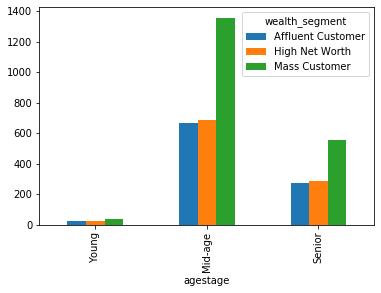

In [158]:
groups=df.groupby(['agestage','wealth_segment']).size().unstack().plot(kind = 'bar')


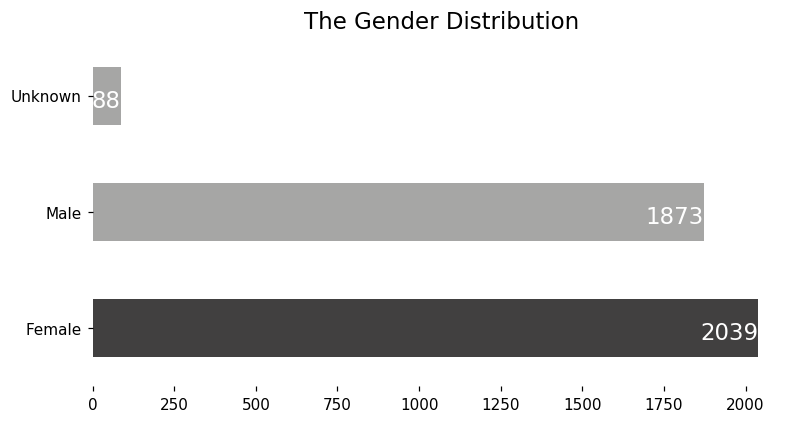

In [109]:

fig, ax = plt.subplots(figsize=(8.2, 4.2),  # width, height in inches
                        dpi=110) 

df['gender'].value_counts().plot(kind='barh',color=[GRAY2]+[GRAY8]*4)

plt.title('The Gender Distribution',fontsize=15)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

for y,x in enumerate(df['gender'].value_counts().tolist()):
   ax.text(x-1,y-0.1,'%s'%round(x,1),
            ha='right',
            size=15,
            color='#FFFFFF')
ax1.set_yticks(np.arange(10))


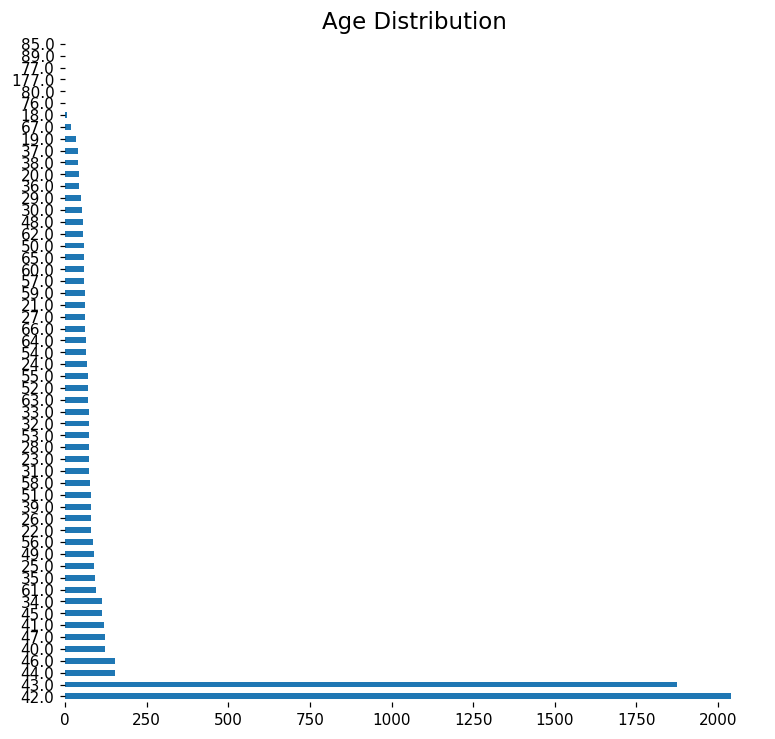

In [110]:
sheet=['Transactions','NewCustomerList','CustomerDemographic','CustomerAddress']

trans=pd.read_excel('/Users/apple/Desktop/KPMG.xlsx', 'Transactions',skiprows=[0])
new=pd.read_excel('/Users/apple/Desktop/KPMG.xlsx', 'NewCustomerList',skiprows=[0])

In [111]:
geo=pd.read_excel('/Users/apple/Desktop/KPMG.xlsx', 'CustomerDemographic',skiprows=[0])
add=pd.read_excel('/Users/apple/Desktop/KPMG.xlsx', 'CustomerAddress',skiprows=[0])

In [112]:
print(trans.info())
print(new.info())
print(geo.info())
print(add.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [113]:
print(trans.isnull().sum())
print('\n')
print(new.isnull().sum())
print('\n')
print(geo.isnull().sum())
print('\n')
print(add.isnull().sum())

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                  

In [114]:
print(trans['customer_id'].nunique())
print(geo['customer_id'].nunique())
print(add['customer_id'].nunique())

3494
4000
3999


In [115]:
set1=set(list(trans.columns))
set2=set(list(new.columns))
set3=set(list(geo.columns))
set4=set(list(add.columns))

In [116]:
print(set1&set3&set4)

{'customer_id'}
